In [9]:
from deck import BlackjackShoe
from dealer import Dealer
from round import BlackjackRound
from hand import Hand
from game import Game, BLACKJACKSIXTOFIVEPAYOUT, BLACKJACKTHREETOTWOPAYOUT
from strategies.strategy import StrategyTable
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



In [2]:
rounds = []
games = []
num_players = 1
num_games = 1
bet_size = 10
num_rounds = 1000000
win_count_matrix = np.zeros((10, 35))
profit_count_matrix = np.zeros((10, 35))
total_count_matrix = np.zeros((10, 35))
total_profit_matrix = np.zeros((10, 35))
for _ in range(num_games):
    game = Game(num_decks=8, num_players=num_players, strategy=StrategyTable["MULTIDECK"], hit_on_soft_17=True, blackjack_payout=BLACKJACKTHREETOTWOPAYOUT, min_bet=bet_size, denominations=100, player_bankroll=0, resplit_till=4)
    for player in game.players:
        player.ace_five_counting = False
        player.high_low_counting = False
    round_data = game.play(num_rounds, print_cards=False, print_round_results=False)
    rounds.extend(round_data)
    games.append(game.house_bankroll)
    win_count_matrix += game.win_count_matrix
    profit_count_matrix += game.profit_count_matrix
    total_count_matrix += game.total_count_matrix
    total_profit_matrix += game.total_profit_matrix


win_percentage_matrix = np.divide(win_count_matrix, total_count_matrix, out=np.zeros_like(win_count_matrix), where=total_count_matrix != 0)
profit_matrix = np.divide(profit_count_matrix - total_profit_matrix, total_profit_matrix, out=np.zeros_like(profit_count_matrix), where=total_profit_matrix != 0)
sum = 0
wins = 0
losses = 0
pushes = 0
for g in rounds:
    if g > 0:
        wins += 1
    elif g < 0:
        losses += 1
    else:
        pushes += 1
    sum += g
print(sum)

print(sum / num_players / num_games / num_rounds)
print(f"Wins: {wins / num_rounds}, Losses: {losses / num_rounds}, Pushes: {pushes / num_rounds}")
print()

=== Results After 1000000 Games ===
Player 0: $-36340.0
House Bankroll: $36340.0
Cards Left: 229
Decks Left: 4.5
36340.0
0.03634
Wins: 0.478062, Losses: 0.433617, Pushes: 0.088321



In [ ]:
def create_win_hard_plot(matrix):

    hard_matrix = matrix[:, :16]

    hard_matrix = hard_matrix.T

    # Define labels:
    hard_totals = list(range(5, 21))  # Hard totals from 5 to 20 (16 values)
    dealer_labels = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "A"]

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        hard_matrix,
        annot=True,
        fmt=".3f",
        cmap="RdYlGn",  # Red for lower win rates, green for higher win rates
        xticklabels=dealer_labels,  # Dealer up cards at the top
        yticklabels=hard_totals,    # Hard totals on the left
        vmin = 0,
        vmax = 1
    )
    ax.xaxis.set_label_position('top')  # Moves the x-axis label to the top
    ax.set_xlabel("Dealer Up Card", labelpad=15)  # Adjust labelpad as needed
    ax.xaxis.tick_top()  # Moves the tick labels to the top

    ax.set_title("Win Probability Heatmap for Hard Totals (5-20) vs Dealer Up Card")
    ax.set_xlabel("Dealer Up Card")
    ax.set_ylabel("Player Hard Total")
    plt.show()

def create_win_soft_plot(matrix):

    soft_matrix = matrix[:, 16:25]

    soft_matrix = soft_matrix.T

    soft_totals = [f"A{i}" for i in range(2, 11)]
    dealer_labels = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "A"]

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        soft_matrix,
        annot=True,
        fmt=".3f",
        cmap="RdYlGn",  # Red for lower win rates, green for higher win rates
        xticklabels=dealer_labels,  # Dealer up cards at the top
        yticklabels=soft_totals,    # Hard totals on the left
        vmin = 0,
        vmax = 1
    )
    ax.xaxis.set_label_position('top')  # Moves the x-axis label to the top
    ax.set_xlabel("Dealer Up Card", labelpad=15)  # Adjust labelpad as needed
    ax.xaxis.tick_top()  # Moves the tick labels to the top

    ax.set_title("Win Probability Heatmap for Soft Totals (A2-A10) vs Dealer Up Card")
    ax.set_xlabel("Dealer Up Card")
    ax.set_ylabel("Player Hard Total")
    plt.show()

def create_win_split_plot(matrix):
    split_matrix = matrix[:, 25:35]

    split_matrix = split_matrix.T

    pair_totals = [f"{i} {i}" for i in range(2, 11)]
    pair_totals.append("A A")
    dealer_labels = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "A"]

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        split_matrix,
        annot=True,
        fmt=".3f",
        cmap="RdYlGn",  # Red for lower win rates, green for higher win rates
        xticklabels=dealer_labels,  # Dealer up cards at the top
        yticklabels=pair_totals,    # Hard totals on the left
        vmin = 0,
        vmax = 1
    )
    ax.xaxis.set_label_position('top')  # Moves the x-axis label to the top
    ax.set_xlabel("Dealer Up Card", labelpad=15)  # Adjust labelpad as needed
    ax.xaxis.tick_top()  # Moves the tick labels to the top

    ax.set_title("Win Probability Heatmap for Split Totals (22-AA) vs Dealer Up Card")
    ax.set_xlabel("Dealer Up Card")
    ax.set_ylabel("Player Hard Total")
    plt.show()






def create_profit_hard_plot(matrix):

    hard_matrix = matrix[:, :16]

    hard_matrix = hard_matrix.T

        # Define labels:
    hard_totals = list(range(5, 21))  # Hard totals from 5 to 20 (16 values)
    dealer_labels = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "A"]

    norm = mcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1.5)

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        hard_matrix,
        annot=True,
        fmt=".3f",
        cmap="RdYlGn",  # Red for lower win rates, green for higher win rates
        norm = norm,
        xticklabels=dealer_labels,  # Dealer up cards at the top
        yticklabels=hard_totals,    # Hard totals on the left
    )
    ax.xaxis.set_label_position('top')  # Moves the x-axis label to the top
    ax.set_xlabel("Dealer Up Card", labelpad=15)  # Adjust labelpad as needed
    ax.xaxis.tick_top()  # Moves the tick labels to the top

    ax.set_title("Profit Heatmap for Hard Totals (5-20) vs Dealer Up Card")
    ax.set_xlabel("Dealer Up Card")
    ax.set_ylabel("Player Hard Total")
    plt.show()

def create_profit_soft_plot(matrix):

    soft_matrix = matrix[:, 16:25].T

    soft_totals = [f"A{i}" for i in range(2, 11)]
    dealer_labels = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "A"]

    norm = mcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1.5)

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        soft_matrix,
        annot=True,
        fmt=".3f",
        cmap="RdYlGn",  # Red for lower win rates, green for higher win rates
        norm=norm,
        xticklabels=dealer_labels, 
        yticklabels=soft_totals,
    )
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel("Dealer Up Card", labelpad=15) 
    ax.xaxis.tick_top()  

    ax.set_title("Profit Heatmap for Soft Totals (A2-A10) vs Dealer Up Card")
    ax.set_xlabel("Dealer Up Card")
    ax.set_ylabel("Player Hard Total")
    plt.show()

class CustomProfitNorm(mcolors.Normalize):
    def __call__(self, value, clip=None):
            # Ensure we work with an array
        v = np.asarray(value, dtype=float)
        res = np.empty_like(v)
            
            # For values <= 0: map -1 -> 0, 0 -> 0.5 (raw scale)
        mask_neg = v < 0
        res[mask_neg] = (v[mask_neg] + 1) * 0.5  # Linear: -1 => 0, 0 => 0.5
            
            # For values between 0 and 1: map 0 -> 0.5, 1 -> 1
        mask_mid = (v >= 0) & (v <= 1)
        res[mask_mid] = 0.5 + 0.5 * v[mask_mid]    # 0 => 0.5, 1 => 1
            
            # For values > 1: map 1 -> 1, 1.5 -> 1.2 (so that 1 in the new scale gets the deep-green color)
        mask_high = v > 1
        res[mask_high] = 1 + ((v[mask_high] - 1) / 0.5) * 0.2  # 1 => 1, 1.5 => 1.2
            
            # Now res runs from 0 to 1.2; scale it to [0, 1]:
        return res / 1.2
def create_profit_split_plot(matrix):
    # Extract the split matrix (columns 25 to 34) and transpose so that rows represent pairs.
    split_matrix = matrix[:, 25:35].T

    # Define labels for pairs and dealer up cards.
    pair_totals = [f"{i} {i}" for i in range(2, 11)]
    pair_totals.append("A A")
    dealer_labels = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "A"]

    # Use our custom normalization over the data range -1 to 1.5.
    norm = CustomProfitNorm(vmin=-1, vmax=1.5)

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        split_matrix,
        annot=True,
        fmt=".3f",
        cmap="RdYlGn",  # RdYlGn: red (low) -> yellow (neutral) -> green (high)
        norm=norm,
        xticklabels=dealer_labels,
        yticklabels=pair_totals,
    )
    
    # Move x-axis labels to the top.
    ax.xaxis.set_label_position('top')
    ax.set_xlabel("Dealer Up Card", labelpad=15)
    ax.xaxis.tick_top()

    ax.set_title("Profit Heatmap for Split Totals (22-AA) vs Dealer Up Card")
    ax.set_ylabel("Player Pair")
    plt.show()



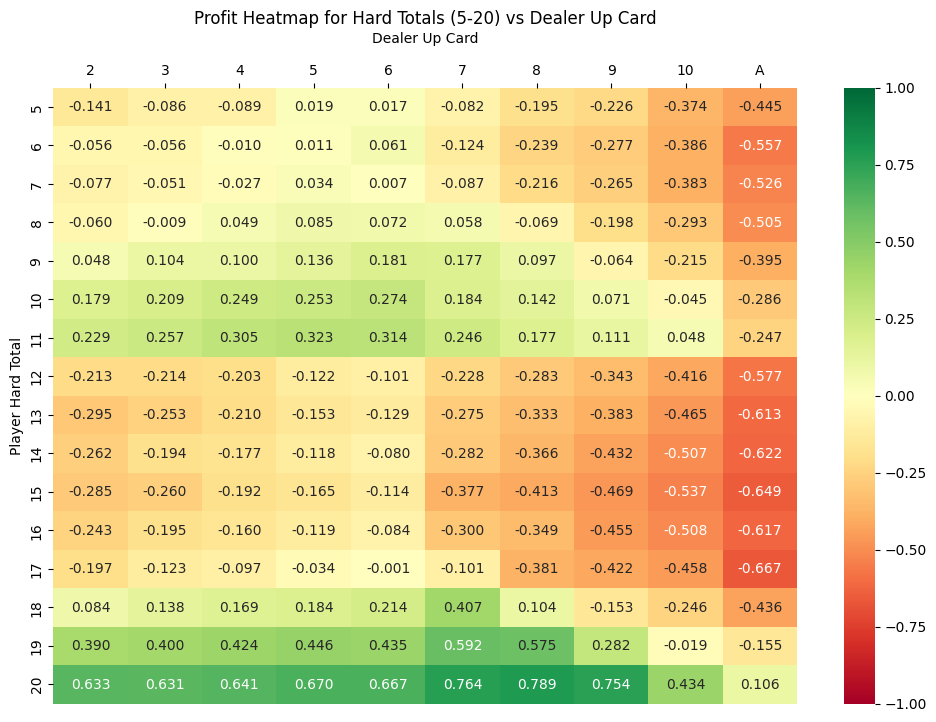

In [21]:
create_profit_hard_plot(profit_matrix)

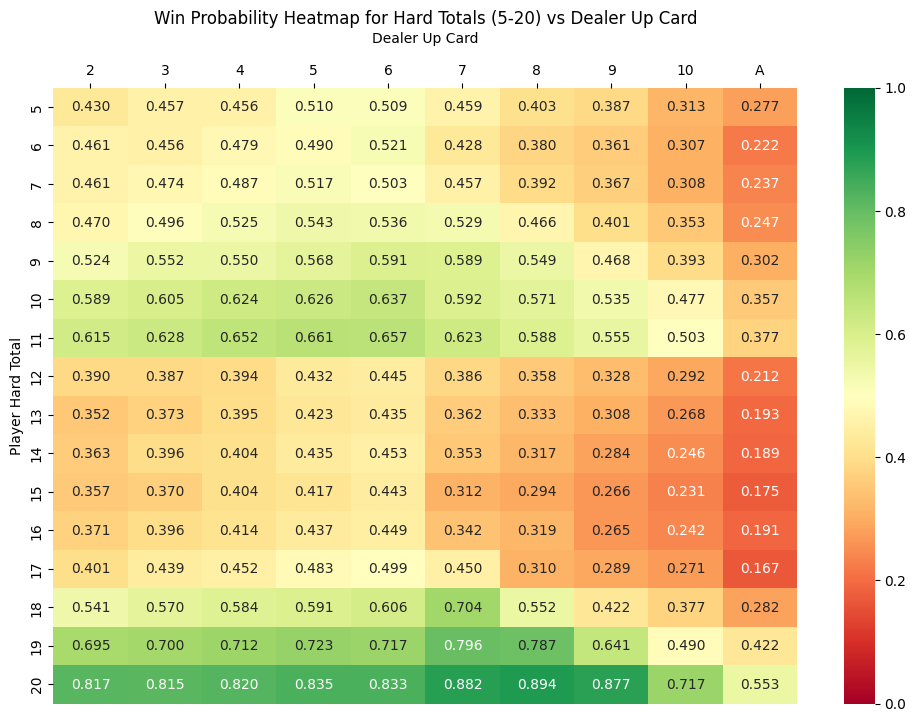

In [22]:
create_win_hard_plot(win_percentage_matrix)

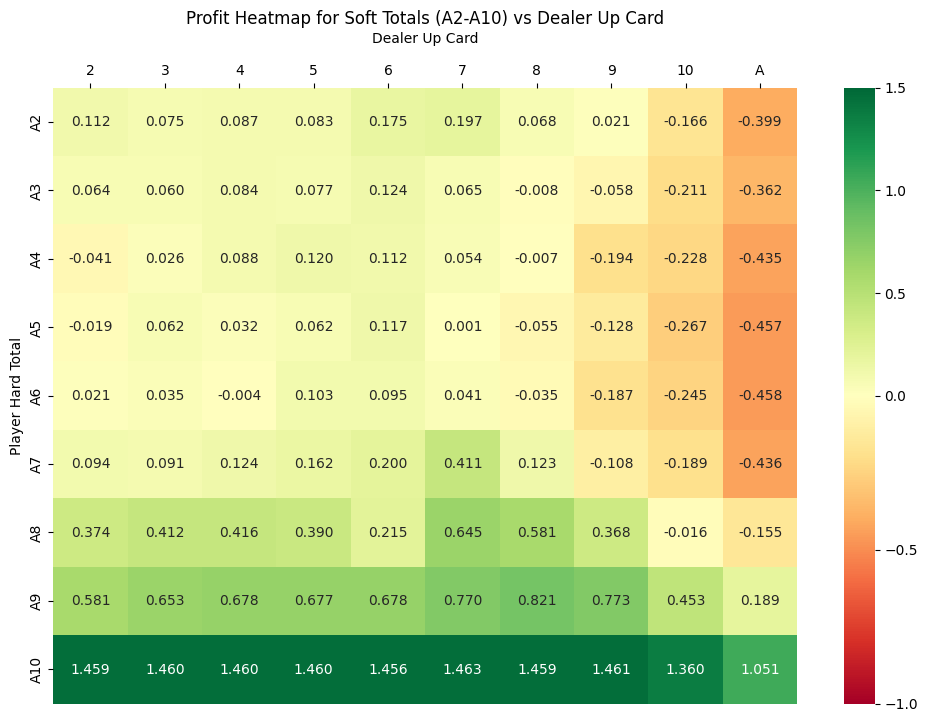

In [27]:
create_profit_soft_plot(profit_matrix)

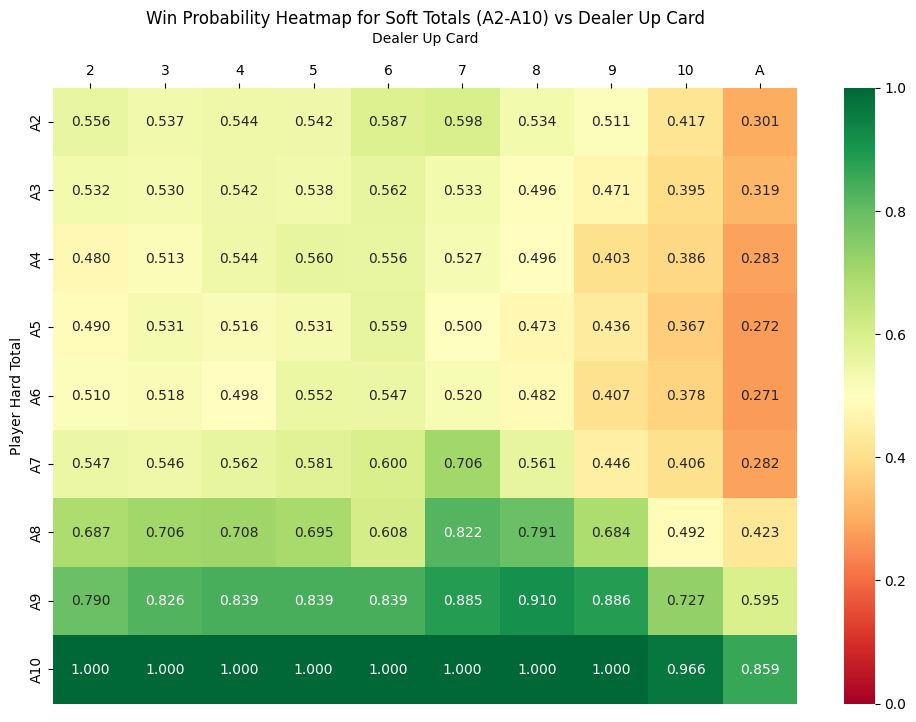

In [28]:
create_win_soft_plot(win_percentage_matrix)

In [38]:
create_profit_split_plot(profit_matrix)

UnboundLocalError: cannot access local variable 'CustomProfitNorm' where it is not associated with a value

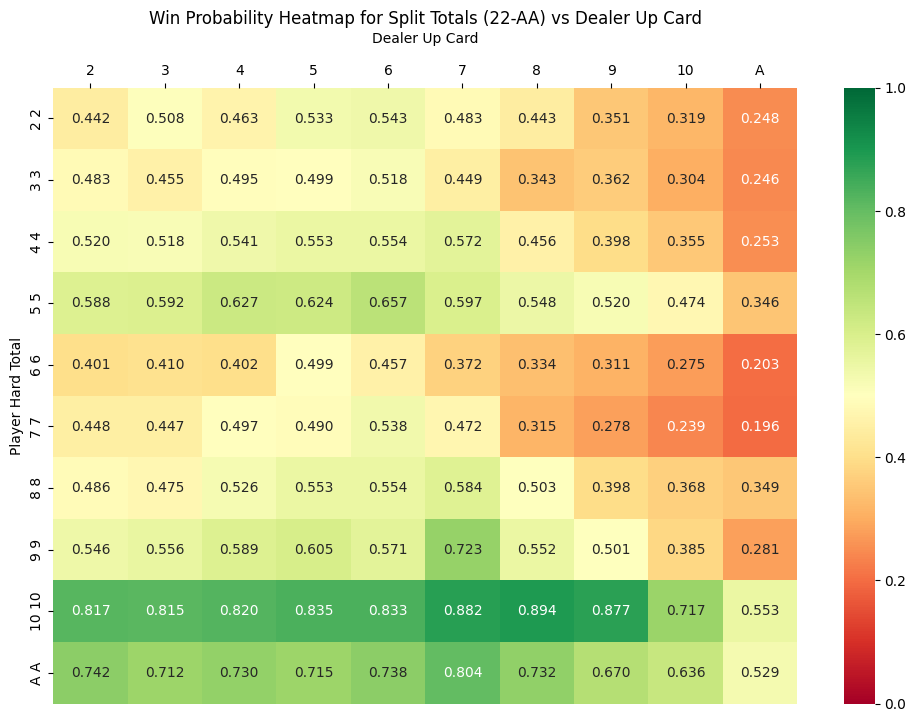

In [30]:
create_win_split_plot(win_percentage_matrix)